In [51]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [52]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Data Preprocessing

In [53]:
df = pd.read_csv("WineQT.csv")
df.head(15)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [54]:
df.drop_duplicates()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,white,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [56]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [57]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [58]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())
df.isnull().sum().sum()

np.int64(0)

In [59]:
df["type"] = df["type"].replace({'white' : 1,
                                 'red' : 0})
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [60]:
print(df["type"].unique())


[1 0]


# Exploratory Data Analysis

---

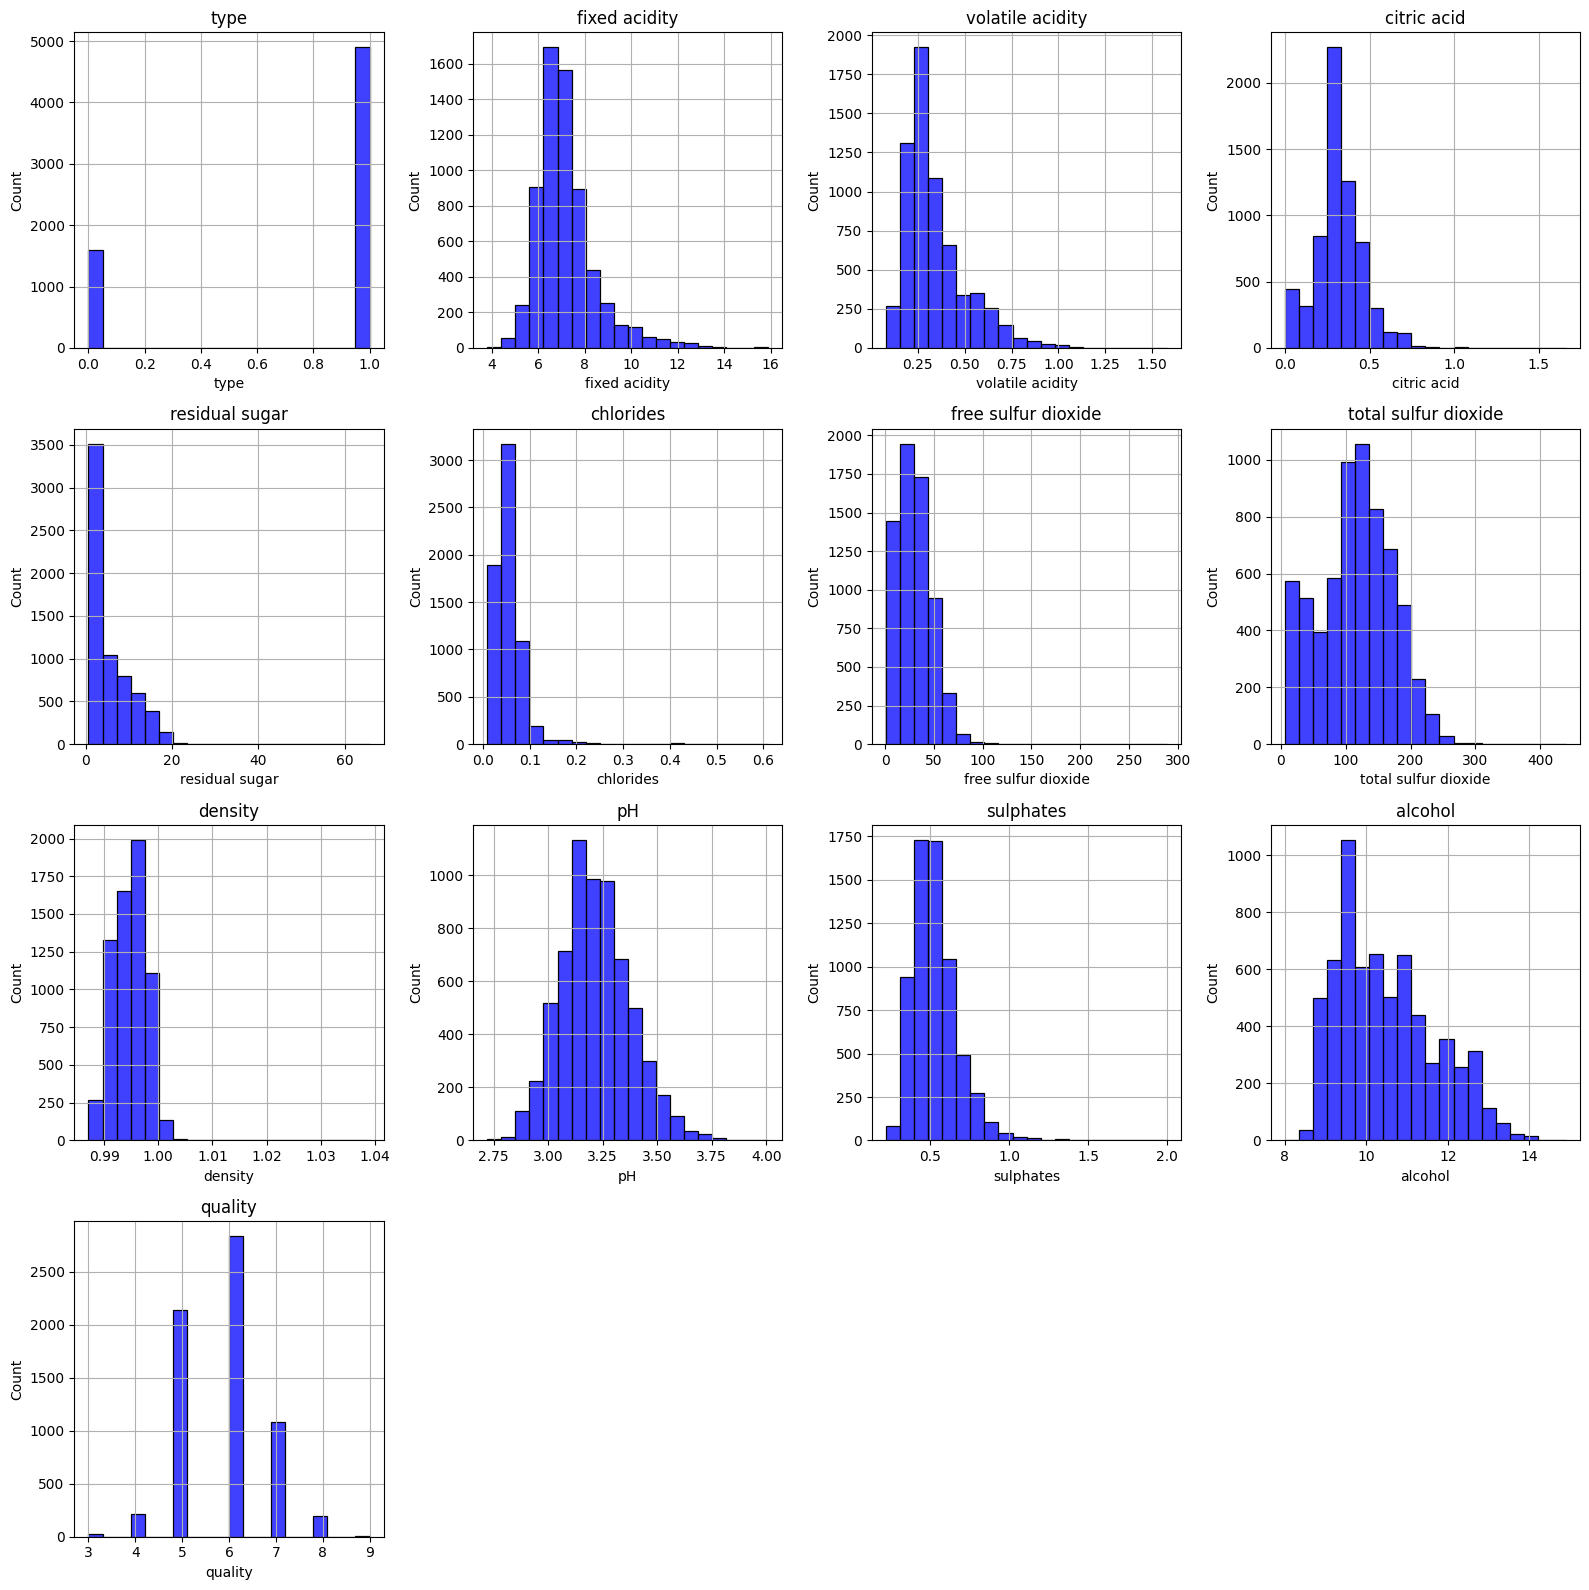

In [61]:
num_cols = df.select_dtypes(include=np.number).columns
n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, bins=20, ax=axes[i], color="blue",kde=False)
    axes[i].set_title(col)
    axes[i].grid(True)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    

plt.tight_layout()
plt.show()

## Conclusion

In these graphs, we can observe the **distributions of all variables** in the wine dataset. This visualization provides valuable insights that can guide preprocessing and feature engineering for further analysis or modeling.

## Distribution betwen Quality and Alcohol

In [62]:
df_grouped = df.groupby('quality')['alcohol'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
df_grouped


,quality,mean,median,std,min,max
0,3,10.215000,10.15,1.106497,8.0,12.6
1,4,10.180093,10.00,0.985923,8.4,13.5
2,5,9.837783,9.60,0.814416,8.0,14.9
3,6,10.587553,10.50,1.126491,8.4,14.0
4,7,11.386006,11.40,1.199337,8.6,14.2
5,8,11.678756,12.00,1.278921,8.5,14.0
6,9,12.180000,12.50,1.013410,10.4,12.9


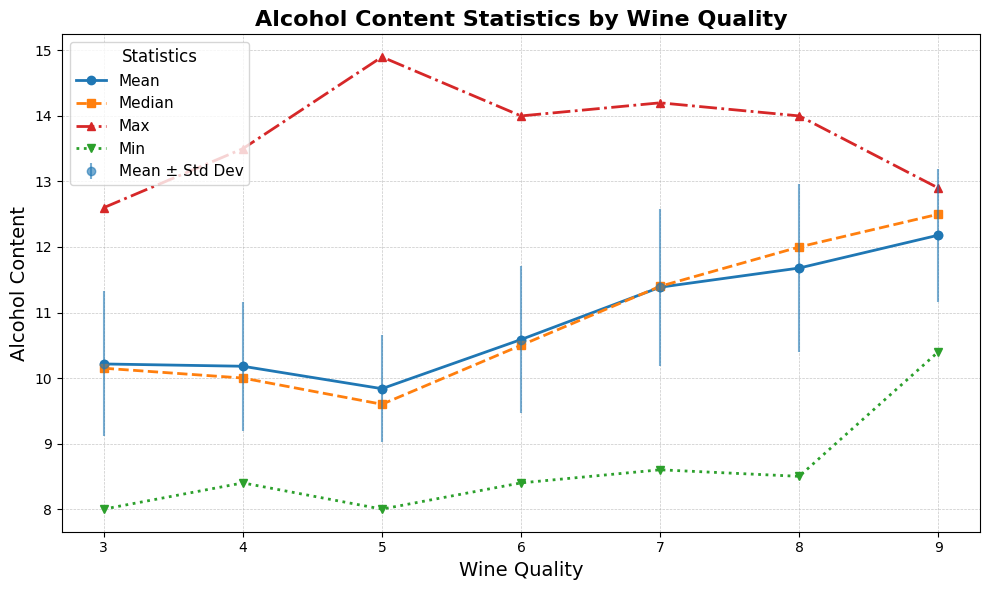

In [63]:
plt.figure(figsize=(10, 6))

plt.plot(df_grouped['quality'], df_grouped['mean'], marker='o', label='Mean', color='tab:blue', linestyle='-', linewidth=2)
plt.plot(df_grouped['quality'], df_grouped['median'], marker='s', label='Median', color='tab:orange', linestyle='--', linewidth=2)
plt.plot(df_grouped['quality'], df_grouped['max'], marker='^', label='Max', color='tab:red', linestyle='-.', linewidth=2)
plt.plot(df_grouped['quality'], df_grouped['min'], marker='v', label='Min', color='tab:green', linestyle=':', linewidth=2)

# Error bars using the standard deviation (optional)
plt.errorbar(df_grouped['quality'], df_grouped['mean'], yerr=df_grouped['std'], fmt='o', color='tab:blue', alpha=0.6, label='Mean ± Std Dev')

plt.title('Alcohol Content Statistics by Wine Quality', fontsize=16, fontweight='bold')
plt.xlabel('Wine Quality', fontsize=14)
plt.ylabel('Alcohol Content', fontsize=14)

plt.legend(title='Statistics', title_fontsize=12, fontsize=11, loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout() 
plt.show()

# Conclusion

The graph illustrates the relationship between wine quality and alcohol content, showing how several statistical measures of alcohol content vary across different quality ratings.

## Key Observations:

### 1. **Mean and Median Trend:**
Both the **mean** and **median** alcohol content show a general increase as wine quality ratings increase, suggesting a positive association between alcohol level and perceived quality.

### 2. **Maximum Alcohol Content:**
The maximum alcohol content remains relatively high and stable across most quality ratings, with a slight decline at the highest quality rating (9).

### 3. **Minimum Alcohol Content:**
The minimum alcohol content shows more variability, with a noticeable increase at quality level 9.

### 4. **Variability:**
The **error bars**, representing the standard deviation around the mean, indicate that the variability in alcohol content is generally consistent across quality ratings.

---

## Overall Conclusion:
The graph suggests that higher quality wines tend to have a higher average alcohol content, though there is some overlap in alcohol content ranges across different quality levels.

---

## Correlation Matrix

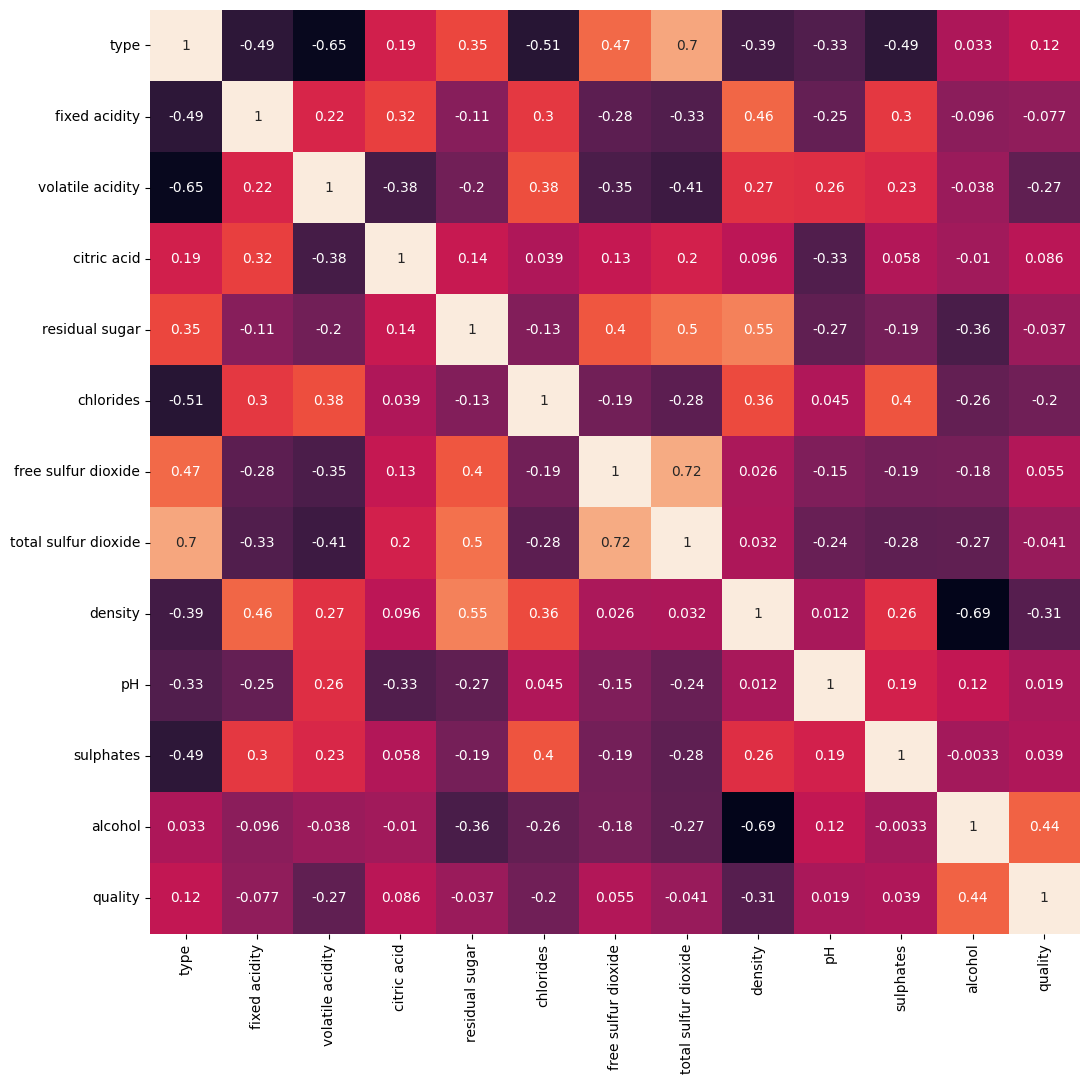

In [64]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

## Conclusion

This correlation matrix reveals the relationships between various chemical properties in the wine dataset.

A **strong positive correlation** exists between **"Fixed acidity"** and **"Citric acid,"** as well as between **"Density"** and **"Alcohol."**  
This suggests that wines with higher fixed acidity tend to have higher citric acid content and density, and that wines with higher density tend to have a higher alcohol content.  
**Alcohol** also shows a **moderate positive correlation** with **"Quality."**

**"Volatile acidity"** shows a **moderate negative correlation** with **"Quality,"** indicating that higher volatile acidity is associated with lower wine quality.  
**"pH"** is **moderately negatively correlated** with **"Fixed acidity."**

---

### Important Note

As observed in the matrix, **"Free sulfur dioxide"** and **"Total sulfur dioxide"** exhibit a **very high positive correlation (0.72).**  
This indicates that these two variables provide very similar information.  
In such cases, it's common practice to remove one of the highly correlated features to reduce redundancy in the data.  
Therefore, **"Free sulfur dioxide"** was removed from the dataset.


In [65]:
df = df.drop('free sulfur dioxide', axis=1)

# Model Selection

In [66]:
df["best quality"] = [1 if x > 5 else 0 for x in df.quality]

In [67]:
df["quality"].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [68]:
df["best quality"].value_counts()

best quality
1    4113
0    2384
Name: count, dtype: int64

In [69]:
df = df.dropna()
df.shape

(6497, 13)

In [70]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,1,7.0,0.27,0.36,20.7,0.045,170.0,1.0010,3.00,0.45,8.8,6,1
1,1,6.3,0.30,0.34,1.6,0.049,132.0,0.9940,3.30,0.49,9.5,6,1
2,1,8.1,0.28,0.40,6.9,0.050,97.0,0.9951,3.26,0.44,10.1,6,1
3,1,7.2,0.23,0.32,8.5,0.058,186.0,0.9956,3.19,0.40,9.9,6,1
4,1,7.2,0.23,0.32,8.5,0.058,186.0,0.9956,3.19,0.40,9.9,6,1


In [71]:
X = df.drop(['quality', 'best quality'], axis=1)
y = df["best quality"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [73]:
class MinMaxScaler:
    
    def __init__(self, feature_range = (0,1)):
        self.min = None
        self.max = None
        self.range_min, self.range_max = feature_range

    def fit(self, X):
        self.min = X.min(axis=0)
        self.max = X.max(axis=0)

    def transform(self, X):
        return (X - self.min) / (self.max - self.min) * (self.range_max - self.range_min) + self.range_min

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    def inverse_transform(self, X_scaled):
        return (X_scaled - self.range_min) / (self.range_max - self.range_min) * (self.max - self.min) + self.min

In [74]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
model = CatBoostClassifier(
    iterations=1500,
    learning_rate=0.05,
    depth=7,
    l2_leaf_reg=10,
    random_state=42,
    verbose=100
)
eval_result = model.fit(
    X_train_scaled, 
    y_train, 
    eval_set=(X_test, y_test), 
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6774787	test: 0.6931472	best: 0.6931472 (0)	total: 159ms	remaining: 3m 58s
100:	learn: 0.4347970	test: 0.6305102	best: 0.6287439 (80)	total: 973ms	remaining: 13.5s
200:	learn: 0.3907079	test: 0.6388326	best: 0.6287439 (80)	total: 1.84s	remaining: 11.9s
300:	learn: 0.3527018	test: 0.6274117	best: 0.6265432 (298)	total: 2.74s	remaining: 10.9s
400:	learn: 0.3175208	test: 0.6197502	best: 0.6158222 (383)	total: 3.54s	remaining: 9.69s
500:	learn: 0.2857155	test: 0.6136925	best: 0.6129180 (498)	total: 4.51s	remaining: 8.98s
600:	learn: 0.2605399	test: 0.6179002	best: 0.6107115 (542)	total: 5.42s	remaining: 8.11s
700:	learn: 0.2399515	test: 0.6197782	best: 0.6107115 (542)	total: 6.34s	remaining: 7.23s
800:	learn: 0.2213151	test: 0.6126836	best: 0.6107115 (542)	total: 7.22s	remaining: 6.3s
900:	learn: 0.2032134	test: 0.6155691	best: 0.6107115 (542)	total: 8.08s	remaining: 5.37s
1000:	learn: 0.1882798	test: 0.6192020	best: 0.6107115 (542)	total: 8.93s	remaining: 4.45s
1100:	learn: 0.

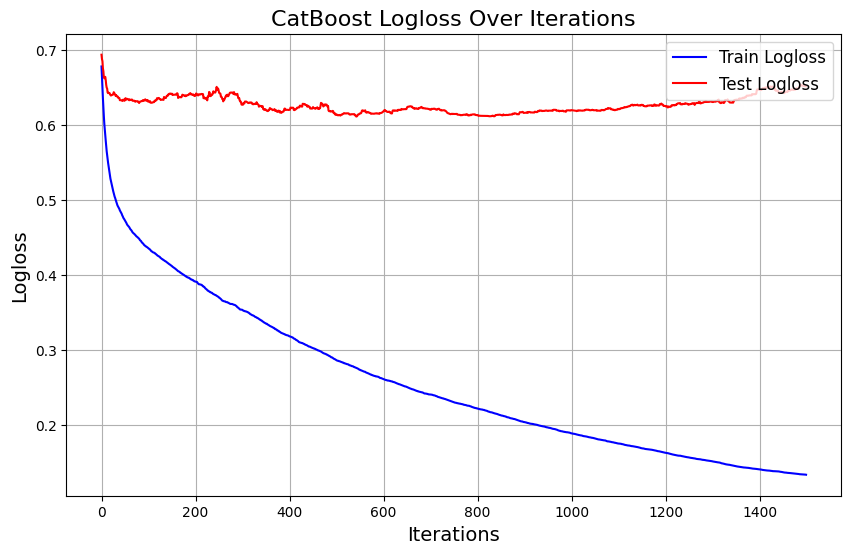

In [32]:
eval_history = eval_result.get_evals_result()

# Extract loss (or other metrics) from the evaluation history
train_loss = eval_history['learn']['Logloss']  # For example, Logloss during training
test_loss = eval_history['validation']['Logloss']  # For example, Logloss during testing

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))

# Plot both training and testing loss
plt.plot(train_loss, label='Train Logloss', color='blue', linestyle='-')
plt.plot(test_loss, label='Test Logloss', color='red', linestyle='-')

# Customize plot
plt.title('CatBoost Logloss Over Iterations', fontsize=16)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Logloss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)

# Show plot
plt.show()


## Conclusion

The graph shows how well a model learns over time, separately for the data it was trained on (**training data**) and new data it hasn't seen before (**test data**).

The model gets much better at fitting the training data as time goes on.


---

In [75]:
y_pred_test = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_report = classification_report(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

In [76]:
cv = StratifiedKFold(
    n_splits = 7,
    shuffle = True,
    random_state = 42
)

y_pred_train_cv = cross_val_predict(
    model, 
    X_train_scaled, 
    y_train, 
    cv=cv, 
    method='predict'
)
train_cv_accuracy = accuracy_score(y_train, y_pred_train_cv)
train_cv_report = classification_report(y_train, y_pred_train_cv)
train_cv_conf_matrix = confusion_matrix(y_train, y_pred_train_cv)

0:	learn: 0.6771838	total: 17.7ms	remaining: 26.5s
100:	learn: 0.4300514	total: 832ms	remaining: 11.5s
200:	learn: 0.3818628	total: 1.64s	remaining: 10.6s
300:	learn: 0.3416753	total: 2.51s	remaining: 10s
400:	learn: 0.3048348	total: 3.38s	remaining: 9.26s
500:	learn: 0.2757655	total: 4.26s	remaining: 8.5s
600:	learn: 0.2493321	total: 5.13s	remaining: 7.68s
700:	learn: 0.2273019	total: 6.06s	remaining: 6.91s
800:	learn: 0.2098429	total: 6.95s	remaining: 6.07s
900:	learn: 0.1920417	total: 7.74s	remaining: 5.14s
1000:	learn: 0.1755353	total: 8.51s	remaining: 4.24s
1100:	learn: 0.1632852	total: 9.27s	remaining: 3.36s
1200:	learn: 0.1497988	total: 10s	remaining: 2.5s
1300:	learn: 0.1380872	total: 10.8s	remaining: 1.66s
1400:	learn: 0.1287439	total: 11.6s	remaining: 821ms
1499:	learn: 0.1197428	total: 12.4s	remaining: 0us
0:	learn: 0.6769844	total: 4.67ms	remaining: 6.99s
100:	learn: 0.4322626	total: 620ms	remaining: 8.59s
200:	learn: 0.3851115	total: 1.35s	remaining: 8.71s
300:	learn: 0.34

In [35]:
print("\nTest Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_report)
print("Test Confusion Matrix:\n", test_conf_matrix)

print("\nTraining (cross-validated) Accuracy:", train_cv_accuracy)
print("Training (cross-validated) Classification Report:\n", train_cv_report)
print("Training (cross-validated) Confusion Matrix:\n", train_cv_conf_matrix)


Test Accuracy: 0.806923076923077
Test Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73       468
           1       0.84      0.86      0.85       832

    accuracy                           0.81      1300
   macro avg       0.79      0.79      0.79      1300
weighted avg       0.81      0.81      0.81      1300

Test Confusion Matrix:
 [[334 134]
 [117 715]]

Training (cross-validated) Accuracy: 0.810659996151626
Training (cross-validated) Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73      1916
           1       0.83      0.87      0.85      3281

    accuracy                           0.81      5197
   macro avg       0.80      0.79      0.79      5197
weighted avg       0.81      0.81      0.81      5197

Training (cross-validated) Confusion Matrix:
 [[1346  570]
 [ 414 2867]]


### **Model Performance Evaluation**

The binary classification model's performance was evaluated using standard metrics to assess predictive accuracy and class-wise behavior on both the **test set** and **cross-validated training set**.

---

#### **Test Set Evaluation**

##### **Key Metrics**

1. **Accuracy**  
   Overall correctness of predictions:  
   $$
   \text{Accuracy}_{\text{test}} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{334 + 715}{1300} \approx 80.69\%
   $$

2. **Precision**  
   Confidence in positive predictions:  
   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$
   - Class 0: 74%  
   - Class 1: 84%

3. **Recall (Sensitivity)**  
   Ability to detect true class instances:  
   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$
   - Class 0: 71%  
   - Class 1: 86%

4. **F1-Score**  
   Harmonic mean of precision and recall:  
   $$
   F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
   $$
   - Class 0: 0.73  
   - Class 1: 0.85

5. **Support**  
   Number of true instances:  
   - Class 0: 468  
   - Class 1: 832

##### **Confusion Matrix**
$$
\begin{bmatrix}
334 & 134 \\
117 & 715 \\
\end{bmatrix}
$$

- **True Positives (TP):** 715  
- **False Positives (FP):** 134  
- **False Negatives (FN):** 117  
- **True Negatives (TN):** 334  

##### **Interpretation**

- High performance on **Class 1**, with precision and recall > 0.84  
- Slightly lower results for **Class 0**, but still reasonable  
- Overall accuracy around **80.7%**, showing solid generalization  
- Balanced performance with slight class skew in favor of class 1

---

#### **Training Set (Cross-Validated) Evaluation**

##### **Key Metrics**

1. **Accuracy**  
   $$
   \text{Accuracy}_{\text{train}} = \frac{1346 + 2867}{5197} \approx 81.07\%
   $$

2. **Precision**  
   - Class 0: 76%  
   - Class 1: 83%

3. **Recall**  
   - Class 0: 70%  
   - Class 1: 87%

4. **F1-Score**  
   - Class 0: 0.73  
   - Class 1: 0.85

5. **Support**  
   - Class 0: 1916  
   - Class 1: 3281

##### **Confusion Matrix**
$$
\begin{bmatrix}
1346 & 570 \\
414 & 2867 \\
\end{bmatrix}
$$

##### **Interpretation**

- Similar performance profile to test set  
- Strong recall for class 1  
- Mild overfitting possible, but **accuracy difference < 1%**, indicating good generalization


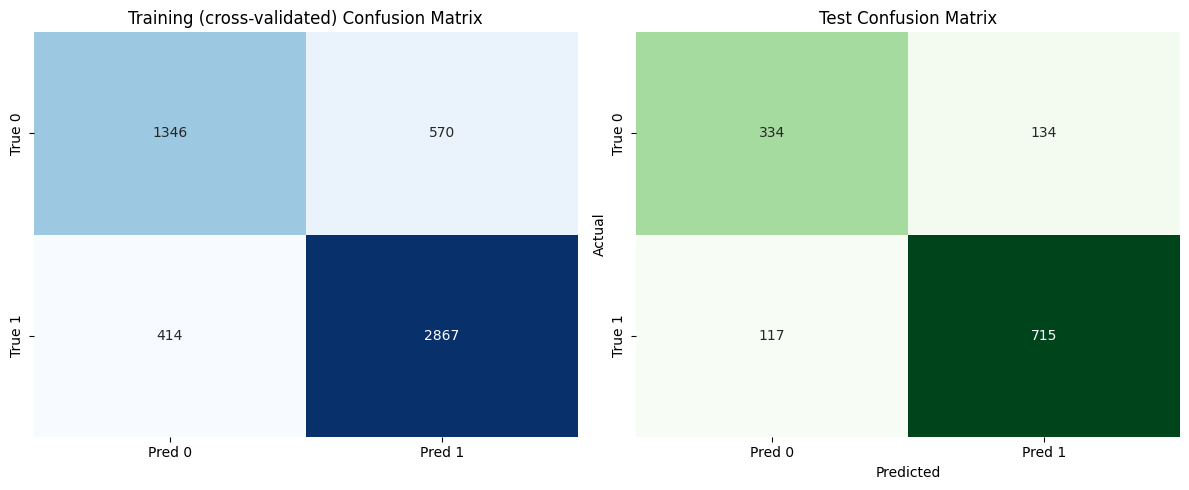

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"],
            ax=axes[1])
axes[0].set_title("Training (cross-validated) Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
sns.heatmap(train_cv_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"],
            ax=axes[0])
axes[1].set_title("Test Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
plt.tight_layout()
plt.show()

## Analysis of the Confusion Matrices

The image presents two confusion matrices, one for **Training (cross-validated)** data and the other for **Test** data. These matrices help us understand how well a classification model is performing. Let's break down what each matrix tells us:

### Training (Cross-Validated) Confusion Matrix

This matrix shows the model's performance on the training data, evaluated using **cross-validation**. Cross-validation gives a more reliable estimate of how the model performs on unseen data.

- **True 0, Pred 0: 1346** – The model correctly predicted 1346 instances of class 0.
- **True 0, Pred 1: 570** – The model incorrectly predicted 570 instances of class 0 as class 1.
- **True 1, Pred 0: 414** – The model incorrectly predicted 414 instances of class 1 as class 0.
- **True 1, Pred 1: 2867** – The model correctly predicted 2867 instances of class 1.

### Test Confusion Matrix

This matrix shows the model's performance on a separate, **unseen test dataset**. This is the most important evaluation of how the model will perform in the real world.

- **True 0, Pred 0: 334** – The model correctly predicted 334 instances of class 0 in the test set.
- **True 0, Pred 1: 134** – The model incorrectly predicted 134 instances of class 0 as class 1 in the test set.
- **True 1, Pred 0: 117** – The model incorrectly predicted 117 instances of class 1 as class 0 in the test set.
- **True 1, Pred 1: 715** – The model correctly predicted 715 instances of class 1 in the test set.

### Comparison and Interpretation

- **Class 1 Prediction**: In both matrices, the model demonstrates a stronger ability to correctly predict class 1 (higher numbers in the bottom right corners).
- **Class 0 Prediction**: The model's performance in predicting class 0 is worse than class 1, with more misclassifications (higher numbers in the top right corners).
- **Overfitting**: Comparing the two matrices, we can see that the model's performance is somewhat worse on the test set than on the training set. For example, the model misclassifies 570 instances of Class 0 in the training set, but misclassifies 134 in the test set. While the test set numbers are lower, the **proportion of errors is higher**. This suggests that the model might be **overfitting** the training data to some extent. Overfitting means the model learns the training data too well and doesn't generalize as well to new, unseen data.

### In Summary

The model performs reasonably well, but there's a noticeable difference in performance between the two classes, with the model being better at predicting **class 1**.
